In [1]:
#from lisa.utils import *
from lisa.library import *
import lisa.models
import numpy as np, pandas as pd, datetime, pytz
import matplotlib.pyplot as plt
from matplotlib.pyplot import *

In [2]:
import matplotlib
from matplotlib.pyplot import cm
import matplotlib.patches as mpatches
import matplotlib.colors as colors
from matplotlib.ticker import NullFormatter, FormatStrFormatter
matplotlib.style.use('ggplot')
#%matplotlib inline

In [3]:
from numpy import array, zeros, argmin, inf, equal, ndim
from scipy.spatial.distance import cdist

def fastdtw(x, y, dist):
    assert len(x)
    assert len(y)
    if ndim(x)==1:
        x = x.reshape(-1,1)
    if ndim(y)==1:
        y = y.reshape(-1,1)
    r, c = len(x), len(y)
    D0 = zeros((r + 1, c + 1))
    D0[0, 1:] = inf
    D0[1:, 0] = inf
    D1 = D0[1:, 1:]
    D0[1:,1:] = cdist(x,y,dist)
    C = D1.copy()
    for i in range(r):
        for j in range(c):
            D1[i, j] += min(D0[i, j], D0[i, j+1], D0[i+1, j])
    if len(x)==1:
        path = zeros(len(y)), range(len(y))
    elif len(y) == 1:
        path = range(len(x)), zeros(len(x))
    else:
        path = _traceback(D0)
    return D1[-1, -1] / sum(D1.shape), C, D1, path

def _traceback(D):
    i, j = array(D.shape) - 2
    p, q = [i], [j]
    while ((i > 0) or (j > 0)):
        tb = argmin((D[i, j], D[i, j+1], D[i+1, j]))
        if (tb == 0):
            i -= 1
            j -= 1
        elif (tb == 1):
            i -= 1
        else: # (tb == 2):
            j -= 1
        p.insert(0, i)
        q.insert(0, j)
    return array(p), array(q)

In [4]:
# the random data
x = np.array([0, 0, 1, 1, 2, 4, 2, 1, 2, 1, 1, 0])
y = np.array([1, 2, 1, 3, 2, 2, 2, 4, 2, 0])
dist, cost, acc, path = fastdtw(x, y, 'euclidean')
print(path)

(array([ 0,  1,  2,  3,  4,  4,  4,  4,  5,  6,  7,  8,  9, 10, 11]), array([0, 0, 1, 2, 3, 4, 5, 6, 7, 8, 8, 8, 8, 8, 9]))


Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['sqrt', 'radians', 'dist', 'hypot', 'sin', 'colors', 'histogram', 'draw_if_interactive', 'cos']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


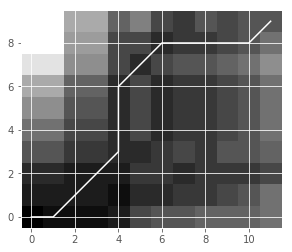

In [5]:
%pylab inline
imshow(acc.T, origin='lower', cmap=cm.gray, interpolation='nearest')
matrix = numpy.zeros(shape=(10,12)) 
#im = plt.imshow(matrix, origin='lower', cmap=cm.gray, interpolation='nearest')

plot(path[0], path[1], 'w')



#plt.colorbar()
#plot(path[0], path[1], 'b')

#xlim((0, matrix.shape[1]))
#ylim((0, matrix.shape[0]))

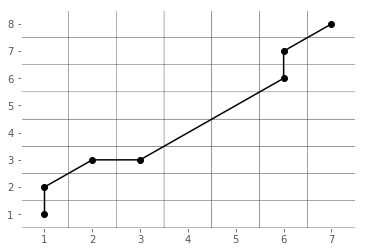

In [6]:
bpath = [np.array([0,1,2,2,2,3,4,5,5]), np.array([1,2,2,3,4,5,5,6,7])] #boundary
bpath = [np.array([0,1,2,2,2,3,4,5,5,6]), np.array([0,1,2,3,4,5,4,5,6,7])] #condition
bpath = [np.array([0,0,1,2,5,5,6]), np.array([0,1,2,2,5,6,7])] #step size
#bpath = [np.array([0,1,2,3,4,4,5,5,6]), np.array([0,1,1,2,3,4,5,6,7])] #valid


len_y = 8
len_x = 7
matrix = np.zeros((len_y,len_x))
labelsx = np.arange(len_x)+1
labelsy = np.arange(len_y)+1

fig, ax = plt.subplots()
im = ax.pcolor(matrix, edgecolor='black', linestyle='-', cmap='Greys')
plot(bpath[0]+0.5, bpath[1]+0.5, 'black', marker="o")

# Shift ticks to be at 0.5, 1.5, etc

ax.xaxis.set(ticks=np.arange(0.5, len(labelsx)), ticklabels=labelsx)
ax.yaxis.set(ticks=np.arange(0.5, len(labelsy)), ticklabels=labelsy)

plt.savefig('/Users/adrian/Uni/MasterThesis/Stuff/figures/path_step_size.eps', format='eps', dpi=1000)
#plt.show()

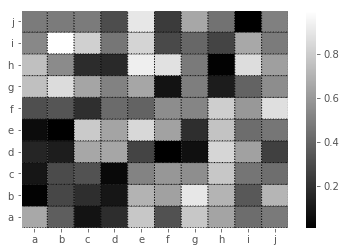

In [7]:
data = np.random.random((10,10))
labels = 'abcdefghij'

fig, ax = plt.subplots()
im = ax.pcolor(data, cmap='gray', edgecolor='black', linestyle=':', lw=1)
fig.colorbar(im)

# Shift ticks to be at 0.5, 1.5, etc
for axis in [ax.xaxis, ax.yaxis]:
    axis.set(ticks=np.arange(0.5, len(labels)), ticklabels=labels)

plt.show()


(-0.5, 9.5)

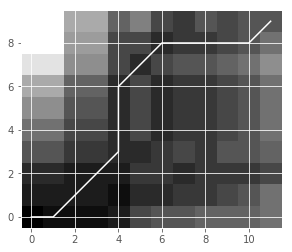

In [8]:
imshow(acc.T, origin='lower', cmap=cm.gray, interpolation='nearest')
plot(path[0], path[1], 'w')
xlim((-0.5, acc.shape[0]-0.5))
ylim((-0.5, acc.shape[1]-0.5))

In [5]:
import os
os.environ['PATH'] = os.environ['PATH'] + ':/Library/TeX/texbin' 

from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

#matplotlib.rcParams['text.usetex']=True
#matplotlib.rcParams['text.latex.unicode']=True

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

In [6]:
nullfmt = NullFormatter()

# definitions for the axes
#left, width = 0.12, 0.50
#bottom, height = 0.08, 0.50
#bottom_h =  0.16 + width 
#left_h = left + 0.27 
left, width = 0.04, 0.55
bottom, height = 0.08, 0.55
bottom_h =  0.16 + width 
left_h = left + 0.26
rect_plot = [left_h, bottom, width, height]
rect_x = [left_h, bottom_h-0.06, width, 0.2]
rect_y = [left, bottom+0.045, 0.2, height-0.09125]

# start with a rectangular Figure
fig = plt.figure(2, figsize=(8, 8))

axplot = plt.axes(rect_plot)
axx = plt.axes(rect_x)
axy = plt.axes(rect_y)

# Plot the matrix
#axplot.pcolor(acc.T,cmap=cm.gray)
#axplot.plot(path[0], path[1], 'w')
#axplot.set_xlim((0, len(x)))
#axplot.set_ylim((0, len(y)))
#axplot.tick_params(axis='both', which='major', labelsize=12)

im = axplot.imshow(acc.T, origin='lower', cmap=cm.gray, interpolation='nearest')
cbaxes = plt.axes([left_h+width+0.06, bottom+0.045, 0.05, height-0.09125]) 
#cbaxes = [left_h+width+0.07, bottom+0.05, 0.05, height-0.1]
cb = plt.colorbar(im, cax=cbaxes)
cb.outline.set_edgecolor('#000000')

axplot.tick_params(axis='both', which='major', labelsize=14)
#axplot.set_xticks([1,3,5,7,9,11])

axplot_xlabels = [int(i+1) for i in axplot.get_xticks()]
axplot.set_xticklabels(axplot_xlabels)
axplot_ylabels = [int(i+1) for i in axplot.get_yticks()]
axplot.set_yticklabels(axplot_ylabels)

axplot.plot(path[0], path[1], 'w')

for spine in ['left','right','top','bottom']:
    axplot.spines[spine].set_color('#000000')

for line in axplot.get_xgridlines():
    line.set_alpha(0)
    
for line in axplot.get_ygridlines():
    line.set_alpha(0)
    
# Plot time serie horizontal
axx.plot(x, color='#db0f4e', label='X')
axx.tick_params(axis='both', which='major', labelsize=14)
#xloc = plt.MaxNLocator(4)
#x2Formatter = FormatStrFormatter('%d')
#axx.yaxis.set_major_locator(xloc)
#axx.yaxis.set_major_formatter(x2Formatter)

axx.set_xticklabels([-1,1,3,5,7,9,11,13])

font = {'size': 16}
axx.set_ylabel(r'$Y$', rotation=0, labelpad=15, fontdict=font, va='top')

for spine in ['left','right','top','bottom']:
    axx.spines[spine].set_color('#000000')   
    

    
# Plot time serie vertical
axy.plot(y-1,[0,1,2,3,4,5,6,7,8,9], color='#1f77b4')

axy_xlabels = [int(i+1) for i in axy.get_xticks()]
axy.set_xticklabels(axy_xlabels, fontdict={'size':14})

axy.invert_xaxis()
#yloc = plt.MaxNLocator(4)
#xFormatter = FormatStrFormatter('%d')
#axy.xaxis.set_major_locator(yloc)
#axy.xaxis.set_major_formatter(xFormatter)
#axy.tick_params(axis='both', which='major', labelsize=14)
axy.set_xlabel(r'$X$', fontdict=font)
axy.set_yticklabels([-1,1,3,5,7,9,11], fontdict={'size':14})

for spine in ['left','right','top','bottom']:
    axy.spines[spine].set_color('#000000')    
    
#Limits
axx.set_xlim(axplot.get_xlim())
axy.set_ylim(axplot.get_ylim())

(-0.5, 9.5)

In [8]:
#plt.figure()
#cum_data.plot()

In [7]:
plt.savefig('/Users/adrian/Uni/MasterThesis/Stuff/figures/dtw-matrix-acc-corr.eps', format='eps', dpi=1000)